# Proejct Preliminary Work - week 7

In [1]:
import numpy as np
import os
import struct
import requests
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
def get_number(byte):
    return int.from_bytes(byte, "big")
def parse_images(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        image_count = get_number(f.read(4))
        rows = get_number(f.read(4))
        cols = get_number(f.read(4))
        print("rows: ", rows, "cols", cols);
        images = np.zeros((image_count, rows, cols))

        current_img = 0
        current_row = 0
        current_col = 0

        while current_img < image_count:
            num = get_number(f.read(1))
            images[current_img, current_row, current_col] = num

            if current_row == rows - 1 and current_col == cols - 1:
                current_img += 1
                current_row = 0
                current_col = 0
            elif current_col == cols - 1:
                current_row += 1
                current_col = 0
            else:
                current_col += 1
    return images
def parse_labels(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        label_count = get_number(f.read(4))

        labels = np.zeros((label_count))
        current_label = 0

        while current_label < label_count:
            num = get_number(f.read(1))
            labels[current_label] = num
            current_label += 1

        return labels
def parse_data():
    train_images_path =os.path.abspath("train-images-idx3-ubyte")
    test_images_path = os.path.abspath("t10k-images-idx3-ubyte")

    train_labels_path =os.path.abspath("train-labels-idx1-ubyte")
    test_labels_path = os.path.abspath("t10k-labels-idx1-ubyte")

    x_train = parse_images(train_images_path)
    y_train = parse_labels(train_labels_path)

    x_test = parse_images(test_images_path)
    y_test = parse_labels(test_labels_path)

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = parse_data()

rows:  28 cols 28
rows:  28 cols 28


In [4]:
def printIMG(index):
    for a in range(28):
        for b in range(28):
            print(1 if x_train[index][a][b] > 50 else 0, end=" ")
        print(" ")


In [5]:
for i in range(5):
    printIMG(i)
    print()


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 

In [6]:
x = y_train.reshape(-1,1)
dataframe = pd.DataFrame.from_records(x)
dataframe = dataframe.rename(columns={0:'digit'})
dataframe.head(3)

,digit
0,5.0
1,0.0
2,4.0


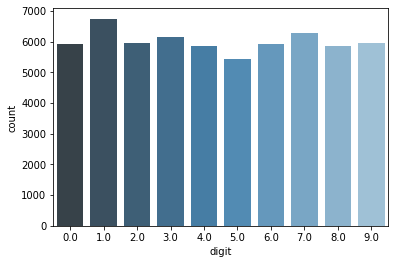

In [7]:
ax = sns.countplot(x=dataframe.iloc[:,0], data=dataframe, palette='Blues_d')
fig = ax.get_figure()
fig.savefig("train_digit.png")
ax

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 5923,
 1.0: 6742,
 2.0: 5958,
 3.0: 6131,
 4.0: 5842,
 5.0: 5421,
 6.0: 5918,
 7.0: 6265,
 8.0: 5851,
 9.0: 5949}

In [9]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [10]:
# x_train = x_train[:1000]
# y_train = y_train[:1000]
# x_test = x_test[:2000]
# y_test = y_test[:2000]
# features_train = x_train.reshape(1000, 28 * 28)
# target_train = y_train
# features_test = x_test.reshape(2000, 28 * 28)
# target_test = y_test
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(features_train,target_train)

In [11]:
# num_neighbors = []
# err_train = []
# err_test = []
# for K in np.arange(10)+1:
#     knn = KNeighborsClassifier(n_neighbors=K)
#     knn.fit(features_train,target_train)
#     num_neighbors.append(K)
#     err_train.append(1-knn.score(features_train,target_train))
#     err_test.append(1-knn.score(features_test,target_test))
# errors = pd.DataFrame()
# errors['neighbors'] = num_neighbors
# errors['train err'] = err_train
# errors['test err'] = err_test
# errors.head(3)

In [12]:
df = pd.DataFrame.from_records(x_train.flatten().reshape(60000,784))
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_test = pd.DataFrame.from_records(x_test.flatten().reshape(10000,784))
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df["digit"] = y_train

In [15]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [16]:
time.perf_counter()

51.9182785

In [17]:
sample_size = [100, 500, 1000, 5000, 10000]
stats = []
for size in sample_size:
    print("----------------------------------------------------------")
    stat = {}
    total_time_train = 0
    total_time_test = 0
    df_train_sample = df.sample(n=size, random_state=1)
    features_train = df_train_sample.drop('digit',axis=1)
    target_train =df_train_sample.digit
    features_test = x_test.reshape(10000, 28 * 28)
    target_test = y_test
    
    num_neighbors = []
    err_train = []
    err_test = []
    for K in np.arange(10)+1:
        knn = KNeighborsClassifier(n_neighbors=K)
        start_time = time.perf_counter()
        knn.fit(features_train,target_train)
        end_time = time.perf_counter()
        
        total_time_train += round(end_time - start_time , 3)
        print("train time used: ", round(end_time - start_time , 3), "with ", K, "neighbors", "size: ", size)

        num_neighbors.append(K)
    
        err_train.append(1-knn.score(features_train,target_train))
        
        start_time = time.perf_counter()
        err_test.append(1-knn.score(features_test,target_test))
        end_time = time.perf_counter()
        
        total_time_test += round(end_time - start_time , 3)
        print("test time used: ", round(end_time - start_time, 3), "with ", K, "neighbors", "size: ", size)

    errors = pd.DataFrame()
    errors['neighbors'] = num_neighbors
    errors['train err'] = err_train
    errors['test err'] = err_test
    print(errors)
    print("-----------------------------------------------------------")
    stat['errors'] = errors
    stat['time_train'] = total_time_train / 10
    stat['time_test'] = total_time_test / 10
    stats.append(stat)







----------------------------------------------------------
train time used:  0.005 with  1 neighbors size:  100
test time used:  1.029 with  1 neighbors size:  100
train time used:  0.004 with  2 neighbors size:  100
test time used:  1.04 with  2 neighbors size:  100
train time used:  0.005 with  3 neighbors size:  100
test time used:  1.044 with  3 neighbors size:  100
train time used:  0.004 with  4 neighbors size:  100
test time used:  1.048 with  4 neighbors size:  100
train time used:  0.004 with  5 neighbors size:  100
test time used:  1.059 with  5 neighbors size:  100
train time used:  0.004 with  6 neighbors size:  100
test time used:  1.053 with  6 neighbors size:  100
train time used:  0.005 with  7 neighbors size:  100
test time used:  1.057 with  7 neighbors size:  100
train time used:  0.004 with  8 neighbors size:  100
test time used:  1.053 with  8 neighbors size:  100
train time used:  0.004 with  9 neighbors size:  100
test time used:  1.056 with  9 neighbors size:  1

In [18]:
    stat = {"errors" : [], "time" : 0}
    
    "My name is {0}, I'am {1}".format("John",36)

"My name is John, I'am 36"

knn with  100 train samples
train time:  0.0044
test with 10000 samples, time:  1.0493999999999999
knn with  500 train samples
train time:  0.042499999999999996
test with 10000 samples, time:  5.0998
knn with  1000 train samples
train time:  0.10300000000000001
test with 10000 samples, time:  10.3021
knn with  5000 train samples
train time:  0.712
test with 10000 samples, time:  47.3025
knn with  10000 train samples
train time:  1.7132
test with 10000 samples, time:  94.64689999999999


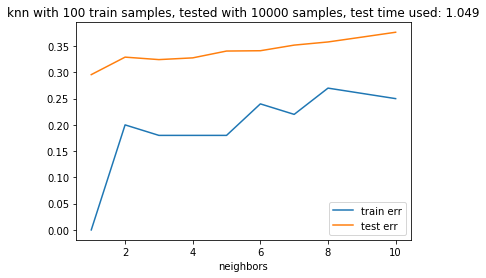

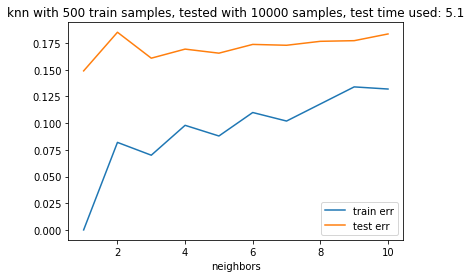

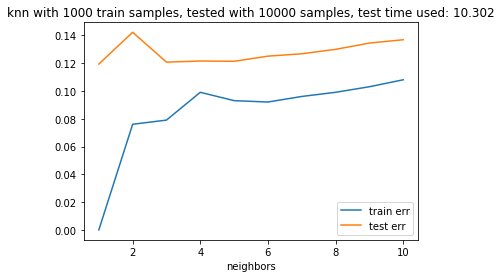

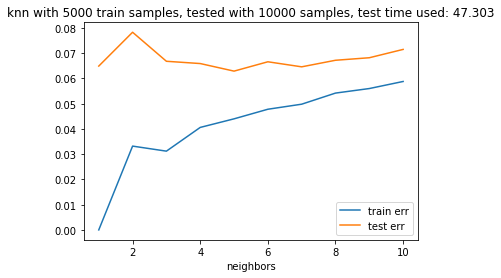

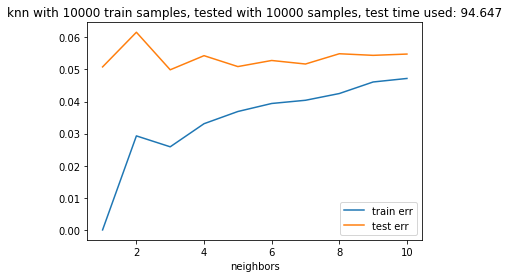

In [19]:
i = 0
for size in sample_size:
    print("knn with ", size, "train samples")
    print("train time: ", stats[i]["time_train"])
    print("test with 10000 samples, time: ", stats[i]["time_test"])
    temp = stats[i]["errors"].set_index("neighbors")
    temp.plot(title="knn with {0} train samples, tested with 10000 samples, test time used: {1}".format(size, round(stats[i]["time_test"],3)))
    i+=1;
    

In [22]:
i = 0
for size in sample_size:
    temp = stats[i]["errors"].set_index("neighbors")
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(temp)
    i+=1

,train err,test err
neighbors,,
1,0.00,0.2957
2,0.20,0.3290
3,0.18,0.3243
4,0.18,0.3276
5,0.18,0.3406
6,0.24,0.3412
7,0.22,0.3519
8,0.27,0.3579
9,0.26,0.3671


,train err,test err
neighbors,,
1,0.000,0.1490
2,0.082,0.1852
3,0.070,0.1609
4,0.098,0.1694
5,0.088,0.1656
6,0.110,0.1738
7,0.102,0.1730
8,0.118,0.1767
9,0.134,0.1773


,train err,test err
neighbors,,
1,0.000,0.1193
2,0.076,0.1422
3,0.079,0.1207
4,0.099,0.1215
5,0.093,0.1213
6,0.092,0.1250
7,0.096,0.1267
8,0.099,0.1299
9,0.103,0.1344


,train err,test err
neighbors,,
1,0.0000,0.0649
2,0.0332,0.0783
3,0.0312,0.0668
4,0.0406,0.0659
5,0.0440,0.0629
6,0.0478,0.0666
7,0.0498,0.0646
8,0.0542,0.0672
9,0.0560,0.0682


,train err,test err
neighbors,,
1,0.0000,0.0508
2,0.0293,0.0616
3,0.0259,0.0499
4,0.0331,0.0543
5,0.0369,0.0509
6,0.0394,0.0528
7,0.0404,0.0517
8,0.0425,0.0549
9,0.0461,0.0544


In [33]:
actual=[7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4,9,6,6,5,4,0,7,4,0,1,3,1,3,4,7,2,7,1,2,1,1,7,4,2,3,5,1,2,4,4,6,3,5,5,6,0,4,1,9,5,7,8,9,3,7,4,6,4,3,0,7,0,2,9,1,7,3,2,9,7,7,6,2,7,8,4,7,3,6,1,3,6,9,3,1,4,1,7,6,9,6,0,5,4,9,9,2,1,9,4,8,7,3,9,7,4,4,4,9,2,5,4,7,6,7,9,0,5,8,5,6,6,5,7,8,1,0,1,6,4,6,7,3,1,7,1,8,2,0,2,9,9,5,5,1,5,6,0,3,4,4,6,5,4,6,5,4,5,1,4,4,7,2,3,2,7,1,8,1,8,1,8,5,0,8,9,2,5,0,1,1,1,0,9,0,3,1,6,4,2,3,6,1,1,1,3,9,5,2,9,4,5,9,3,9,0,3,6,5,5,7,2,2,7,1,2,8,4,1,7,3,3,8,8,7,9,2,2,4,1,5,9,8,7,2,3,0,4,4,2,4,1,9,5,7,7,2,8,2,6,8,5,7,7,9,1,8,1,8,0,3,0,1,9,9,4,1,8,2,1,2,9,7,5,9,2,6,4,1,5,8,2,9,2,0,4,0,0,2,8,4,7,1,2,4,0,2,7,4,3,3,0,0,3,1,9,6,5,2,5,9,2,9,3,0,4,2,0,7,1,1,2,1,5,3,3,9,7,8,6,5,6,1,3,8,1,0,5,1,3,1,5,5,6,1,8,5,1,7,9,4,6,2,2,5,0,6,5,6,3,7,2,0,8,8,5,4,1,1,4,0,3,3,7,6,1,6,2,1,9,2,8,6,1,9,5,2,5,4,4,2,8,3,8,2,4,5,0,3,1,7,7,5,7,9,7,1,9,2,1,4,2,9,2,0,4,9,1,4,8,1,8,4,5,9,8,8,3,7,6,0,0,3,0,2,6,6,4,9,3,3,3,2,3,9,1,2,6,8,0,5,6,6,6,3,8,8,2,7,5,8,9,6,1,8,4,1,2,5,9,1,9,7,5,4,0,8,9,9,1,0,5,2,3,7,8,9,4,0,6,3,9,5,2,1,3,1,3,6,5,7,4,2,2,6,3,2,6,5,4,8,9,7,1,3,0,3,8,3,1,9,3,4,4,6,4,2,1,8,2,5,4,8,8,4,0,0,2,3,2,7,7,0,8,7,4,4,7,9,6,9,0,9,8,0,4,6,0,6,3,5,4,8,3,3,9,3,3,3,7,8,0,8,2,1,7,0,6,5,4,3,8,0,9,6,3,8,0,9,9,6,8,6,8,5,7,8,6,0,2,4,0,2,2,3,1,9,7,5,1,0,8,4,6,2,6,7,9,3,2,9,8,2,2,9,2,7,3,5,9,1,8,0,2,0,5,2,1,3,7,6,7,1,2,5,8,0,3,7,2,4,0,9,1,8,6,7,7,4,3,4,9,1,9,5,1,7,3,9,7,6,9,1,3,7,8,3,3,6,7,2,8,5,8,5,1,1,4,4,3,1,0,7,7,0,7,9,4,4,8,5,5,4,0,8,2,1,0,8,4,5,0,4,0,6,1,7,3,2,6,7,2,6,9,3,1,4,6,2,5,4,2,0,6,2,1,7,3,4,1,0,5,4,3,1,1,7,4,9,9,4,8,4,0,2,4,5,1,1,6,4,7,1,9,4,2,4,1,5,5,3,8,3,1,4,5,6,8,9,4,1,5,3,8,0,3,2,5,1,2,8,3,4,4,0,8,8,3,3,1,7,3,5,9,6,3,2,6,1,3,6,0,7,2,1,7,1,4,2,4,2,1,7,9,6,1,1,2,4,8,1,7,7,4,8,0,7,3,1,3,1,0,7,7,0,3,5,5,2,7,6,6,9,2,8,3,5,2,2,5,6,0,8,2,9,2,8,8,8,8,7,4,9,3,0,6,6,3,2,1,3,2,2,9,3,0,0,5,7,8,1,4,4,6,0,2,9,1,4,7,4,7,3,9,8,8,4,7,1,2,1,2,2,3,2,3,2,3,9,1,7,4,0,3,5,5,8,6,3,2,6,7,6,6,3,2,7,8,1,1,7,5,6,4,9,5,1,3,3,4,7,8,9,1,1,6,9,1,4,4,5,4,0,6,2,2,3,1,5,1,2,0,3,8,1,2,6,7,1,6,2,3,9,0,1,2,2,0,8,9,9,0,2,5,1,9,7,8,1,0,4,1,7,9,6,4,2,6,8,1,3,7,5,4,4,1,8,1,3,8,1,2,5,8,0,6,2,1,1,7,1,5,3,4,6,9,5,0,9,2,2,4,8,2,1,7,2,4,9,4,4,0,3,9,2,2,3,3,8,3,5,7,3,5,8,1,2,4,4,6,4,9,5,1,0,6,9,5,9,5,9,7,3,8,0,3,7,1,3,6,7,8,5,9,7,9,6,9,6,3,7,4,4,5,3,5,4,7,8,7,8,0,7,6,8,8,7,3,3,1,9,5,2,7,3,5,1,1,2,1,4,7,4,7,5,4,5,4,0,8,3,6,9,6,0,2,7,4,4,4,4,6,6,4,7,9,3,4,5,5,8,7,3,7,2,7,0,2,4,1,1,6,6,9,2,8,7,2,0,1,5,0,9,1,7,0,6,0,8,6,8,1,8,0,3,3,7,2,3,6,2,1,6,1,1,3,7,9,0,8,0,5,4,0,2,8,7,2,9,8,4,0,9,5,8,5,1,2,1,3,1,7,4,5,7,2,0,9,8,8,6,2,5,4,1,9,2,1,5,8,7,0,2,4,4,3,6,8,8,2,4,0,5,0,4,4,7,9,3,4,1,5,9,7,3,5,8,8,0,5,3,3,6,6,0,1,6,0,3,5,4,4,1,2,9,1,4,6,9,9,3,9,8,4,4,3,1,3,1,8,8,7,9,4,8,8,7,9,7,1,4,5,6,0,5,2,2,2,1,5,5,2,4,9,6,2,7,7,2,2,1,1,2,8,3,7,2,4,1,7,1,7,6,7,8,2,7,3,1,7,5,8,2,6,2,2,5,6,5,0,9,2,4,3,3,9,7,6,6,8,0,4,1,5,8,2,9,1,8,0,6,7,2,1,0,5,5,2,0,2,2,0,2,4,9,8,0,9,9,4,6,5,4,9,1,8,3,4,9,9,1,2,2,8,1,9,6,4,0,9,4,8,3,8,6,0,2,5,1,9,6,2,9,4,0,9,6,0,6,2,5,4,2,3,8,4,5,5,0,3,8,5,3,5,8,6,5,7,6,3,3,9,6,1,1,2,9,0,4,3,3,6,9,5,7,3,7,7,7,8,7,9,8,3,0,7,2,7,9,4,5,4,9,3,2,1,4,0,2,3,7,5,7,8,8,5,0,1,1,4,8,3,9,0,0,0,6,6,2,3,7,8,4,7,7,9,2,4,1,4,5,2,4,9,9,1,8,4,0,9,8,4,8,7,7,0,7,8,8,6,0,4,8,8,2,4,7,6,6,6,4,7,1,8,8,2,3,6,3,0,0,3,7,6,9,7,9,9,5,4,3,3,6,1,2,3,7,3,3,2,0,3,3,8,4,3,6,3,5,0,2,0,9,0,7,4,6,9,3,5,1,9,6,1,4,5,4,5,0,5,9,5,2,1,2,9,1,9,9,4,0,8,4,5,2,9,2,1,2,1,7,3,6,8,8,4,9,1,9,8,5,7,5,1,1,8,6,5,2,4,4,3,2,3,5,6,8,8,6,2,3,1,0,5,8,9,2,9,6,7,0,4,8,7,1,7,4,1,0,9,7,2,0,0,9,1,7,8,7,8,4,7,2,0,4,6,0,3,1,1,3,3,9,6,7,4,1,5,3,0,8,7,3,9,6,9,3,5,0,2,7,4,5,1,7,5,8,0,8,8,1,5,0,3,0,3,1,4,0,3,7,2,7,1,8,0,7,0,4,3,1,9,8,7,7,1,4,9,9,3,2,1,7,9,0,2,0,3,3,7,6,9,2,3,3,7,7,0,0,7,5,2,9,8,7,4,4,2,6,6,1,9,6,8,2,9,0,8,3,1,1,6,3,5,1,1,1,3,1,2,3,0,2,0,1,3,5,5,7,4,8,9,6,9,6,8,3,6,6,8,5,1,4,2,4,4,5,1,1,9,0,2,4,9,5,7,1,8,8,5,6,9,8,7,1,1,6,7,6,3,2,2,0,8,9,2,5,1,0,8,1,9,5,7,9,6,9,0,6,1,5,5,8,3,8,2,6,5,0,7,4,6,1,3,4,7,3,2,3,4,2,5,2,7,1,7,2,6,4,1,5,7,8,6,0,1,8,2,5,7,7,6,9,3,5,8,4,2,4,0,8,8,3,4,9,2,7,5,8,6,5,6,0,8,6,7,3,6,4,9,4,6,6,3,2,4,1,0,1,4,6,2,9,1,1,0,6,3,9,5,6,5,6,5,8,4,6,4,3,9,1,3,4,1,9,1,7,1,1,9,3,5,4,0,7,3,6,1,7,5,5,3,3,0,1,5,7,5,8,6,5,1,0,4,2,3,4,6,7,9,8,1,8,4,9,2,8,6,2,7,0,0,6,7,5,8,6,0,9,3,7,1,3,5,4,3,3,5,5,6,3,0,2,3,4,2,3,0,9,9,4,7,2,8,4,7,0,6,2,8,5,2,8,5,7,3,0,8,2,3,2,8,2,5,5,7,6,4,6,8,4,8,2,7,4,5,2,0,3,9,4,6,7,2,5,6,1,1,2,3,6,7,8,7,6,4,8,9,4,8,6,3,8,3,1,0,6,2,2,5,6,9,5,8,1,4,1,7,8,4,6,1,8,4,3,1,2,8,0,8,5,9,1,4,2,0,2,7,0,9,0,2,5,7,6,7,9,4,2,6,2,4,4,8,0,4,4,5,8,0,6,8,9,8,5,6,9,0,4,8,7,1,3,4,5,8,0,9,1,3,3,6,9,8,7,1,0,5,7,1,7,5,2,7,9,1,8,5,2,4,9,4,7,2,2,3,4,9,1,9,2,1,7,9,4,4,1,6,7,2,7,8,8,1,9,7,1,1,7,5,3,3,5,1,3,7,6,1,3,8,7,5,9,9,0,0,2,8,8,2,3,7,1,3,0,3,4,4,3,8,9,2,3,9,7,1,1,7,0,4,9,6,5,9,1,7,0,2,0,0,4,6,7,0,7,1,4,6,4,5,4,9,9,1,7,9,5,3,3,8,2,3,6,2,2,1,1,1,1,1,6,9,8,4,3,7,1,6,4,5,0,4,7,4,2,4,0,7,0,1,9,8,8,6,0,0,4,9,6,8,2,2,3,8,4,8,2,2,1,7,5,4,4,0,4,3,9,7,3,1,0,1,2,5,9,2,1,0,1,8,9,1,6,8,3,8,9,3,6,2,8,3,2,2,1,0,4,2,9,2,4,3,7,9,1,5,2,4,9,0,3,8,5,3,6,0,9,4,6,2,5,0,2,7,4,6,6,8,6,6,8,6,9,1,7,2,5,9,9,0,7,2,7,6,7,0,6,5,2,4,7,2,0,9,9,2,2,9,4,4,2,3,3,2,1,7,0,7,6,4,1,3,8,7,4,5,9,2,5,1,8,7,3,7,1,5,5,0,9,1,4,0,6,3,3,6,0,4,9,7,5,1,6,8,9,5,5,7,9,3,8,3,8,1,5,3,5,0,5,5,3,8,6,7,7,7,3,7,0,5,9,0,2,5,5,3,1,7,7,8,6,5,9,3,8,9,5,3,7,9,1,7,0,0,3,7,2,5,8,1,8,6,2,9,5,7,5,7,8,6,2,5,1,4,8,4,5,8,3,0,6,2,7,3,3,2,1,0,7,3,4,0,3,9,3,2,8,9,0,3,8,0,7,6,5,4,7,3,9,0,8,6,2,5,6,1,0,0,4,4,0,1,2,3,2,7,7,8,5,2,5,7,6,9,1,4,1,6,4,2,4,3,5,4,3,9,5,0,1,5,3,8,9,1,9,7,9,5,5,2,7,4,6,0,1,1,1,0,4,4,7,6,3,0,0,4,3,0,6,1,9,6,1,3,8,1,2,5,6,2,7,3,6,0,1,9,7,6,6,8,9,2,9,5,8,3,1,0,0,7,6,6,2,1,6,9,3,1,8,6,9,0,6,0,0,0,6,3,5,9,3,4,5,5,8,5,3,0,4,0,2,9,6,8,2,3,1,2,1,1,5,6,9,8,0,6,6,5,5,3,8,6,2,1,4,5,4,3,7,8,5,0,9,3,5,1,1,0,4,4,7,0,1,7,0,1,6,1,4,5,6,6,5,7,8,4,4,7,2,5,3,7,0,7,7,9,6,4,2,8,5,7,8,3,9,5,8,9,9,8,6,2,8,9,2,3,6,1,1,8,9,3,4,0,7,9,6,4,1,4,1,3,4,9,3,1,4,7,7,4,7,2,9,3,0,8,8,8,4,0,4,4,1,5,2,8,3,4,9,5,2,8,1,5,3,7,9,4,2,5,6,3,5,9,3,5,9,3,1,9,5,3,0,6,9,8,4,0,4,9,2,9,0,1,0,3,1,6,5,8,1,5,3,3,0,3,5,5,9,2,8,7,0,4,9,1,9,7,7,5,5,2,0,9,1,8,6,2,3,9,6,2,1,9,1,3,5,5,0,3,8,3,3,7,6,6,0,1,4,0,6,9,8,1,2,9,9,5,9,7,3,7,8,0,1,3,0,4,6,1,0,2,5,8,4,4,1,1,5,4,6,6,0,6,9,2,6,2,7,1,7,9,4,0,0,3,8,2,2,3,1,6,0,5,7,7,9,2,6,7,9,7,8,6,8,8,4,6,8,4,1,2,8,1,3,9,4,0,3,7,3,2,3,3,7,3,4,0,6,2,0,8,1,5,3,5,4,1,7,1,5,7,5,7,3,2,2,7,3,7,3,7,8,5,4,5,2,5,6,5,3,6,7,4,1,7,1,5,2,3,6,3,1,4,2,6,7,4,3,8,0,6,2,1,6,5,3,9,1,9,3,2,1,8,4,4,6,5,8,6,9,7,7,8,6,9,7,3,9,4,0,5,4,6,4,1,2,3,0,0,2,6,6,5,7,0,8,6,4,7,9,0,7,3,4,2,1,8,8,5,9,2,7,1,8,8,8,2,7,6,0,1,2,7,1,0,8,3,6,0,5,3,6,2,8,7,0,1,4,2,1,1,4,4,4,4,7,1,6,2,9,9,0,0,1,8,8,4,3,4,2,0,6,1,6,1,2,2,2,1,2,3,7,8,1,0,0,2,1,6,6,0,1,6,2,5,1,7,4,8,2,1,4,3,8,3,9,9,4,8,3,4,7,2,7,5,7,0,4,3,3,2,6,7,6,0,0,6,7,7,0,5,5,8,1,0,7,0,2,8,1,5,0,8,8,0,3,2,7,7,2,6,4,7,5,5,5,2,9,2,8,4,6,8,6,5,0,0,8,7,6,1,7,1,1,2,7,4,0,0,7,7,6,3,8,6,4,2,0,9,4,0,5,7,8,2,7,4,7,1,1,3,6,6,2,9,1,9,4,8,3,6,9,5,9,6,2,4,6,7,7,0,6,6,9,4,8,3,5,3,4,9,0,0,5,2,5,0,7,1,1,1,6,7,6,7,9,6,6,4,1,4,3,1,1,2,2,4,1,0,8,7,6,3,4,0,0,6,3,3,0,7,1,7,1,1,3,1,0,9,9,7,5,4,1,4,8,9,5,3,5,1,9,8,2,3,3,9,9,0,1,0,2,9,3,9,3,3,6,2,4,9,8,3,7,4,0,4,7,8,4,9,8,9,9,7,5,9,2,8,2,2,0,2,2,3,8,4,6,8,6,8,2,4,6,7,9,3,3,9,4,3,1,4,4,7,0,5,9,6,0,4,4,4,4,6,1,2,3,3,6,4,5,9,6,8,5,6,5,8,6,4,1,8,6,5,2,8,4,5,5,4,7,7,0,7,8,2,2,3,7,0,1,8,0,7,1,9,8,7,5,5,9,1,7,5,4,9,1,2,2,1,6,6,7,1,1,4,0,7,4,2,4,0,6,4,7,6,9,5,3,4,6,5,0,1,8,8,2,8,3,5,7,8,0,8,5,7,1,1,0,1,3,7,8,5,0,7,1,1,0,1,1,4,5,2,7,6,2,3,0,2,8,5,9,6,9,7,2,1,3,6,4,1,8,2,4,0,5,1,0,2,2,6,4,4,3,9,6,1,6,5,7,9,2,0,2,6,0,1,4,3,5,2,8,8,0,8,8,9,0,9,6,7,6,3,9,3,4,7,7,7,4,9,0,6,4,8,4,2,7,2,8,1,0,0,7,8,3,3,3,1,3,7,6,1,3,1,6,6,5,7,4,7,5,9,5,8,4,9,9,1,6,5,0,1,3,7,0,3,4,8,2,2,0,2,5,1,5,1,4,8,8,9,1,2,1,3,5,1,0,9,4,4,8,3,2,5,9,7,6,6,2,0,0,0,5,8,7,1,5,2,3,8,5,1,8,2,0,4,9,9,6,2,3,3,5,6,4,8,0,9,2,8,3,6,7,5,7,2,9,4,9,1,2,8,6,0,7,0,9,1,1,6,7,5,9,9,1,9,5,9,2,5,0,4,1,0,8,9,0,8,9,8,9,4,2,5,7,9,8,9,8,0,9,9,6,8,9,9,5,9,8,5,1,0,3,3,5,2,1,6,5,0,2,8,1,5,6,2,3,0,2,2,6,4,3,5,5,1,7,2,1,6,9,1,9,9,5,5,1,6,2,2,8,6,7,1,4,6,0,4,0,3,3,2,2,3,6,8,9,8,5,3,8,5,4,5,2,0,5,6,3,2,8,3,9,9,5,7,9,4,6,7,1,3,7,3,6,6,0,9,0,1,9,9,2,8,8,0,1,6,9,7,5,3,4,7,4,9,9,4,3,6,3,1,1,7,6,9,1,8,4,1,1,9,9,4,3,6,8,1,6,0,4,1,3,7,7,4,9,5,1,0,0,1,1,6,2,1,9,8,4,0,3,6,4,9,0,7,1,6,5,7,5,2,5,1,8,5,4,7,0,6,7,0,2,5,8,1,0,4,5,7,1,8,5,1,9,0,0,6,0,7,3,1,8,3,9,7,0,0,8,9,5,9,8,3,2,7,2,9,7,2,1,1,3,7,5,3,1,9,8,2,2,2,8,8,5,7,3,8,9,8,8,6,8,2,3,9,7,5,6,2,9,2,8,8,1,6,8,8,7,9,1,8,0,1,7,2,0,7,5,1,9,0,2,0,9,8,6,2,3,9,3,8,0,2,1,1,1,1,4,2,9,7,2,5,1,1,2,1,9,9,9,1,0,2,0,2,1,1,4,6,4,1,5,4,9,7,7,1,5,6,2,2,2,8,0,6,9,6,1,9,7,7,1,4,8,5,3,4,3,4,9,7,5,0,7,4,8,8,1,5,3,9,5,9,7,6,9,0,3,6,3,9,8,2,2,1,2,8,6,8,5,5,3,9,4,9,2,5,1,5,1,4,4,1,4,4,3,5,9,1,2,2,3,3,0,2,9,0,0,9,9,6,0,9,3,2,8,4,1,9,9,7,2,7,9,9,5,9,5,1,1,8,3,5,1,9,5,3,5,4,9,5,9,3,1,9,0,9,7,5,4,9,2,0,1,0,5,1,4,9,3,3,6,1,5,2,5,2,2,0,9,2,6,6,0,1,2,0,3,0,2,5,5,7,9,5,5,0,8,9,5,0,3,2,5,9,0,8,8,4,5,8,8,4,5,4,8,5,4,9,2,2,1,2,6,8,8,7,0,3,6,6,4,3,8,8,7,2,2,0,0,9,3,9,9,1,9,8,6,6,4,2,6,9,2,8,5,4,5,7,9,9,9,2,1,8,3,4,0,7,8,3,9,3,4,6,5,6,2,3,9,2,6,0,0,6,1,2,8,7,9,8,2,0,4,7,7,5,0,5,6,4,6,7,4,3,0,7,5,0,7,4,2,0,8,9,9,4,2,4,6,7,8,7,6,9,4,1,3,7,3,0,8,8,7,6,9,3,9,2,2,9,2,1,8,3,2,9,6,8,4,0,1,2,8,4,5,2,7,8,1,1,3,0,3,5,7,0,3,1,9,3,6,3,1,7,7,3,0,8,4,8,2,6,5,2,9,7,3,9,0,9,9,6,4,2,9,7,2,1,1,6,7,4,7,5,9,6,8,2,1,4,4,5,7,6,1,3,2,5,9,9,3,6,1,1,4,6,9,7,2,1,5,1,4,6,3,8,1,1,0,3,1,6,8,4,9,0,7,3,0,2,9,0,6,6,6,3,6,7,7,2,8,6,0,8,3,0,2,9,8,3,2,5,3,8,8,0,0,1,9,5,1,3,9,6,0,1,4,1,7,1,2,3,7,9,7,4,9,9,3,9,2,8,2,7,1,8,0,9,1,0,1,7,7,9,6,9,9,9,2,1,6,1,3,5,7,1,9,7,6,4,5,7,6,6,9,9,6,3,6,2,9,8,1,2,2,5,5,2,3,7,2,1,0,1,0,4,5,2,8,2,8,3,5,1,7,8,1,1,2,9,7,8,4,0,3,0,7,8,8,4,7,7,8,5,8,4,9,8,1,3,8,0,3,1,7,9,5,5,1,6,5,7,4,9,3,5,4,7,1,2,0,8,1,6,0,7,3,4,7,3,9,6,0,8,6,4,8,7,7,9,3,8,6,9,7,2,3,4,0,2,1,8,3,5,5,7,2,4,6,7,2,8,3,0,8,7,8,9,0,8,4,4,5,8,5,6,6,3,0,9,3,7,6,8,9,3,4,9,5,8,9,1,2,8,8,6,8,1,3,7,9,0,1,1,4,7,0,8,1,7,4,5,7,1,2,1,1,3,9,6,2,1,2,8,0,7,6,6,9,3,7,0,5,2,8,0,5,4,3,8,4,6,6,2,7,9,5,1,3,2,4,3,6,1,9,4,4,7,6,5,4,1,9,9,2,7,8,0,1,3,6,1,3,4,1,1,1,5,6,0,7,0,7,2,3,2,5,2,2,9,4,9,8,1,2,1,6,1,2,7,8,0,0,0,8,2,2,9,2,2,7,9,9,2,7,5,1,3,4,9,4,1,8,5,6,2,8,3,1,2,8,4,9,9,3,7,0,7,7,2,3,2,4,0,3,9,9,8,4,1,0,6,0,9,6,8,6,1,1,9,8,9,2,3,5,5,9,4,2,1,9,4,3,9,6,0,4,0,6,0,1,2,3,4,7,8,9,0,1,2,3,4,7,8,9,0,1,2,3,4,5,6,7,8,9,8,3,4,7,8,6,3,4,0,9,7,1,9,3,8,4,7,3,0,9,1,4,5,4,6,2,0,6,2,1,1,1,1,7,2,4,7,5,2,9,4,5,8,4,2,9,7,0,0,7,5,1,1,7,6,6,6,8,2,2,7,7,4,0,2,4,2,1,8,9,6,1,0,5,9,6,9,8,0,3,0,8,3,9,6,3,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,5,4,8,7,4,7,7,3,9,8,8,3,1,5,8,2,7,4,2,1,5,4,5,5,8,6,4,4,4,1,8,7,5,5,1,8,9,1,3,6,3,3,2,2,6,9,9,6,5,5,3,3,8,1,6,5,6,8,1,9,7,6,8,3,7,4,7,0,9,0,0,3,7,9,3,0,2,0,1,0,1,0,4,0,1,0,4,7,9,6,2,6,2,2,9,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,8,0,5,6,6,0,8,0,2,3,7,9,4,7,1,9,1,7,1,4,0,0,4,1,7,5,7,1,3,3,3,1,6,9,7,4,3,0,2,5,2,6,0,8,9,4,3,5,4,8,1,5,9,0,6,4,3,6,3,3,8,1,4,7,5,7,2,2,0,0,1,7,7,9,5,9,8,9,6,8,8,2,3,6,1,2,9,8,9,5,2,6,2,4,8,4,6,5,0,1,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,7,4,2,0,9,0,1,5,8,8,0,2,7,8,4,4,6,1,0,4,5,3,9,4,2,0,5,0,1,3,2,9,1,6,0,1,1,8,0,4,7,7,6,3,6,0,7,3,5,4,2,4,1,8,3,5,6,7,0,6,7,1,2,5,8,1,9,3,8,2,8,7,6,7,1,4,6,2,9,3,0,1,2,3,4,5,6,7,0,1,2,3,4,5,0,1,2,8,9,1,4,0,9,5,0,8,0,7,7,1,1,2,9,3,6,7,2,3,8,1,2,9,8,8,7,1,7,1,1,0,3,4,2,6,4,7,4,2,7,4,9,1,0,6,8,5,5,5,3,5,9,7,4,8,5,9,6,9,3,0,3,8,9,1,8,1,6,0,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,3,5,3,2,9,3,2,1,4,5,5,2,3,2,1,3,9,7,2,1,2,8,9,1,8,8,7,8,1,0,0,7,7,8,7,5,0,6,1,5,7,4,6,1,2,5,0,7,9,9,0,3,8,4,4,8,1,8,6,5,9,0,0,0,3,7,1,6,4,2,6,6,0,4,5,4,1,3,8,6,3,9,9,5,9,3,7,8,5,6,4,7,6,2,2,0,9,4,0,1,2,3,4,5,6,7,8,9,0,1,2,3,5,6,0,1,2,3,4,5,6,8,7,1,3,2,8,0,7,5,9,9,6,0,9,4,1,3,2,1,2,3,8,3,2,6,5,6,8,2,7,4,8,1,8,0,5,3,9,4,1,9,2,1,9,6,7,9,0,4,6,1,7,3,8,7,2,9,6,5,8,3,9,0,5,7,1,6,1,0,9,3,3,4,4,0,6,2,5,4,2,3,4,6,0,0,2,0,1,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9,8,7,1,3,7,5,2,8,0,7,5,9,9,0,9,1,1,5,8,8,6,3,2,1,8,3,2,6,5,6,7,4,1,0,5,3,1,9,2,1,9,6,0,4,6,1,7,3,8,7,2,9,6,5,8,3,5,7,1,6,1,0,9,6,2,5,4,2,3,4,4,6,0,0,2,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,8,6,5,0,6,8,9,4,1,9,5,3,0,4,8,9,1,4,0,5,5,2,1,5,4,0,7,6,0,1,7,0,6,8,9,5,1,7,9,8,6,0,8,1,7,7,1,3,2,3,1,4,2,0,0,7,8,4,6,4,9,3,8,4,7,2,5,6,3,6,9,6,3,2,2,4,6,9,0,2,5,5,1,3,3,9,7,8,7,2,2,5,7,9,8,2,1,3,1,3,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,1,2,6,5,3,0,7,0,4,1,4,3,6,7,2,3,1,2,1,2,9,6,0,1,3,0,2,7,5,7,6,2,9,1,9,0,6,0,6,0,2,0,6,1,5,8,4,3,0,1,5,4,4,8,5,7,5,7,8,3,4,8,8,5,2,9,7,1,3,8,1,0,7,5,9,6,9,4,7,7,9,9,3,4,4,3,8,6,2,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,8,3,9,5,5,2,6,8,4,9,1,7,1,2,3,5,9,6,9,1,1,1,2,9,5,6,8,1,2,0,7,7,5,8,2,9,8,9,0,4,6,7,1,3,4,5,6,0,3,6,8,7,0,4,2,7,4,7,5,4,3,4,2,8,1,5,1,2,0,2,5,6,4,3,0,0,0,3,3,5,7,0,6,4,8,8,6,3,4,6,9,9,8,2,7,7,1,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,2,1,7,2,5,0,8,0,2,7,8,8,3,6,0,2,7,6,6,1,2,8,8,7,7,4,7,7,3,7,4,5,4,3,3,8,4,1,1,9,7,4,3,7,3,3,0,2,5,5,6,6,3,5,2,5,9,9,8,4,1,0,6,0,9,6,8,8,5,6,1,1,9,8,9,2,3,5,5,9,4,2,1,9,3,9,2,0,6,0,4,0,0,1,2,3,4,7,8,9,0,1,2,3,7,8,9,0,1,2,3,4,7,8,9,7,3,0,3,1,8,7,6,4,0,2,6,8,3,2,8,1,2,0,7,1,0,4,4,5,8,0,6,2,3,1,5,1,8,5,9,4,0,7,5,8,8,3,8,9,2,6,2,5,3,1,7,3,9,1,9,9,6,0,3,9,2,8,1,4,3,5,2,9,2,5,8,9,5,0,1,2,4,5,6,0,1,2,3,4,5,6,7,1,2,3,4,5,1,0,4,5,6,6,3,4,4,2,8,1,0,6,4,9,7,2,3,3,9,2,0,9,3,3,9,1,5,2,3,7,7,8,4,0,2,4,0,2,4,7,8,0,7,0,6,9,3,2,8,6,0,5,7,5,1,0,8,1,6,7,2,9,7,9,5,8,6,2,6,2,8,1,7,5,0,1,1,3,8,4,9,1,8,6,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,7,8,9,0,1,7,8,9,9,8,9,8,4,1,7,7,3,3,7,6,6,6,1,9,0,1,7,6,3,2,1,7,1,3,9,1,7,6,8,4,1,4,3,6,9,6,1,4,4,7,2,4,4,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,9,0,1,2,3,4,7,8,1,3,5,1,7,7,2,1,4,8,3,4,4,3,9,7,4,1,2,3,5,9,1,6,0,1,0,0,2,8,7,1,1,4,0,4,7,3,6,8,0,3,7,4,0,6,9,2,6,5,8,6,9,0,4,0,6,1,9,2,0,9,5,1,3,7,6,9,3,0,2,2,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,2,1,7,2,5,0,8,0,2,7,8,8,3,0,6,0,2,7,6,6,1,2,8,8,7,7,4,7,7,3,7,4,5,4,3,3,8,4,5,4,1,1,9,7,4,3,7,3,3,0,2,5,5,6,3,1,5,2,5,9,9,8,4,1,0,6,0,9,6,8,8,5,6,1,1,9,8,9,2,3,5,5,9,4,2,1,9,4,9,1,3,9,2,0,6,0,4,0,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,3,8,0,7,1,0,7,5,5,6,9,0,1,0,0,8,3,4,3,1,5,0,0,9,5,3,4,9,3,7,6,9,2,4,5,7,2,6,4,9,4,9,4,1,2,2,5,8,1,3,2,9,4,3,8,2,2,1,2,8,6,5,1,6,7,2,1,3,9,3,8,7,5,7,0,7,4,8,8,5,0,6,6,3,7,6,9,9,4,8,4,1,0,6,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,7,4,0,4,0,1,7,9,5,1,4,2,8,9,4,3,7,8,2,4,4,3,3,6,9,9,5,8,6,7,0,6,8,2,6,3,9,3,2,8,6,1,7,4,8,8,9,0,3,3,9,0,5,2,9,4,1,0,3,7,5,8,7,7,8,2,9,7,1,2,6,4,2,5,2,3,6,6,5,0,0,2,8,1,6,1,0,4,3,1,6,1,9,0,1,4,5,6,7,8,9,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,9,8,4,0,0,7,2,4,3,8,6,6,3,2,6,3,3,0,1,4,7,8,0,3,1,9,0,1,9,1,2,7,0,1,3,8,2,9,2,7,6,5,5,9,9,8,2,9,1,3,2,3,4,3,1,9,0,9,3,6,8,7,0,1,0,5,8,2,7,7,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,1,7,4,8,1,5,6,5,7,2,8,6,3,3,8,6,5,4,0,9,1,7,2,9,1,5,1,3,2,2,3,0,6,4,3,7,6,9,0,4,8,1,4,0,6,1,2,6,9,2,2,3,5,5,1,0,7,7,9,6,2,9,4,7,0,2,3,4,0,0,8,8,8,5,1,3,7,4,9,8,8,9,0,9,8,9,0,2,6,5,6,7,4,7,5,4,1,3,5,3,1,2,3,4,5,6,1,2,3,4,6,0,1,2,4,5,6,7,8,1,7,2,4,1,4,1,4,9,6,8,4,5,3,7,8,4,3,3,5,6,7,0,6,1,6,8,7,0,1,5,0,8,5,0,1,5,8,4,2,3,9,7,6,9,1,9,0,6,7,1,2,3,9,2,4,5,5,3,7,5,3,1,8,2,2,3,0,2,9,4,9,7,0,2,7,4,9,9,2,5,9,8,3,8,6,7,0,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,0,7,2,6,5,5,3,7,8,6,6,6,6,4,3,8,8,3,0,1,9,0,5,4,1,9,1,2,7,0,1,3,8,2,9,2,7,4,2,6,5,5,9,9,1,1,5,7,6,8,2,9,4,3,1,9,0,9,3,6,8,7,0,1,0,5,8,2,7,7,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,8,9,0,1,2,3,4,5,6,7,8,9,2,1,2,1,3,9,9,8,5,3,7,0,7,7,5,7,9,9,4,7,0,3,4,1,5,8,1,4,8,4,1,8,6,6,4,6,0,5,5,3,3,5,7,2,5,9,6,9,2,6,2,1,2,0,8,3,8,3,0,8,7,4,9,5,0,9,7,0,0,4,6,0,9,1,6,2,7,6,8,3,5,2,1,8,3,8,6,1,0,2,1,4,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,7,6,4,7,6,2,3,4,8,7,8,6,9,8,3,2,2,8,4,8,5,6,5,0,2,0,1,1,2,9,6,8,2,1,0,6,5,2,9,7,5,3,9,3,7,1,8,3,8,1,9,5,5,0,1,1,9,8,2,6,0,4,5,0,3,1,8,6,7,5,9,9,3,0,3,1,4,4,0,4,9,0,1,2,3,5,6,7,8,0,1,2,3,5,6,7,8,9,0,1,2,3,5,6,7,8,9,9,7,0,9,0,1,5,8,8,0,9,3,2,7,8,4,6,1,0,4,9,4,2,0,5,0,1,6,9,3,2,9,1,6,0,1,1,8,7,7,6,3,6,0,7,2,4,1,7,0,6,7,1,2,5,8,1,8,2,8,7,6,8,7,1,6,2,9,3,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,8,9,5,7,0,3,1,6,8,4,1,5,6,4,2,7,8,1,3,4,3,4,7,2,0,5,0,1,9,2,3,2,3,5,5,7,8,4,9,9,7,1,1,9,0,7,8,3,4,8,6,3,8,0,9,6,2,1,0,1,0,6,2,3,8,9,0,7,2,3,4,5,5,2,8,5,4,6,6,6,7,9,1,8,2,1,5,3,4,7,9,4,0,0,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,9,0,1,3,1,5,1,2,4,9,2,4,6,8,0,1,1,9,2,6,6,8,7,4,2,9,7,0,2,1,0,3,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,8,6,5,9,7,0,2,3,4,3,8,5,1,5,2,3,0,1,2,1,3,2,6,5,3,0,7,2,7,4,6,4,0,5,9,9,8,9,5,3,1,7,4,7,6,5,4,0,0,6,6,2,0,6,3,7,7,4,4,3,9,2,8,9,6,0,9,5,3,8,8,7,1,4,0,4,8,5,2,3,9,0,1,9,1,5,1,7,4,8,6,2,1,6,8,8,0,1,2,3,4,7,8,9,0,1,2,3,4,6,7,8,9,0,1,2,3,4,7,8,9,1,4,5,3,3,0,9,5,4,3,0,8,4,6,7,0,7,7,1,6,9,1,3,6,2,3,8,2,3,8,9,5,8,8,7,1,7,1,1,0,3,4,2,6,4,7,4,2,7,4,2,9,2,7,9,2,1,0,6,5,3,4,8,5,9,6,9,0,6,3,0,8,1,6,0,0,1,2,3,4,5,6,7,0,1,2,3,4,7,8,9,0,1,2,3,4,7,2,5,1,6,4,3,9,9,0,9,7,1,6,4,3,6,2,0,9,8,6,5,7,0,0,1,7,4,3,2,4,1,3,7,6,4,7,7,7,9,8,4,3,8,2,8,3,5,8,0,5,4,7,1,3,1,7,9,6,2,0,9,1,7,3,3,9,1,6,4,3,9,8,2,1,8,6,4,1,5,5,6,5,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,6,9,7,0,2,3,4,3,8,5,1,3,0,1,2,1,3,2,0,7,2,6,4,0,5,9,9,8,9,5,3,1,7,4,7,0,0,6,6,6,3,7,4,2,8,9,8,7,1,4,0,4,8,5,2,3,9,0,1,9,1,5,1,7,6,1,2,1,6,8,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,0,1,2,3,5,6,7,8,1,0,4,5,6,6,3,4,4,2,8,1,0,6,4,9,7,2,9,2,0,9,3,3,9,1,5,2,3,1,6,7,3,7,8,4,0,2,4,0,2,4,7,8,0,7,0,6,9,3,2,4,8,6,0,5,7,5,1,0,8,1,6,7,2,9,7,9,5,6,5,2,6,2,8,1,7,5,5,7,3,5,0,1,1,3,8,4,9,4,5,1,8,6,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,3,5,3,2,9,3,2,1,4,5,5,2,3,2,1,3,9,7,2,1,2,8,9,1,8,8,7,8,1,0,0,6,7,7,8,7,5,0,6,1,5,7,4,6,1,2,5,0,7,9,9,0,3,4,4,8,4,1,8,6,5,9,0,0,0,3,7,1,6,4,6,0,4,5,4,1,3,8,6,3,9,9,5,9,3,7,8,5,6,4,7,6,2,2,0,9,4,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,6,4,2,6,4,7,5,5,4,7,2,9,3,9,3,8,2,0,9,5,6,0,1,0,6,5,3,5,3,8,0,0,3,4,1,5,3,0,8,3,0,6,2,7,8,1,7,1,3,8,5,4,2,0,9,7,6,7,4,1,6,2,6,7,1,9,8,0,6,9,4,9,9,6,2,3,7,1,9,2,2,5,3,7,8,0,1,2,3,4,7,8,9,0,1,2,3,4,7,8,9,0,1,7,8,9,8,9,2,6,1,3,5,4,8,2,6,4,3,4,5,9,2,0,3,9,4,9,7,3,8,7,4,4,9,8,5,8,2,6,6,2,3,1,3,2,7,3,1,9,0,1,1,3,5,0,7,8,1,5,1,4,6,0,0,4,9,1,6,6,9,0,7,6,1,1,0,1,2,3,4,7,2,3,4,5,6,7,0,1,2,7,8,6,3,9,7,1,9,3,9,6,1,7,2,4,4,5,7,0,0,1,6,6,8,2,7,7,2,4,2,1,6,1,0,6,9,8,3,9,6,3,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,1,6,8,9,9,0,1,2,4,4,3,7,4,4,4,0,3,8,7,5,8,2,1,7,5,3,8,5,2,5,1,1,6,2,1,3,8,6,4,2,6,2,5,5,0,2,8,0,6,8,1,7,9,1,9,2,6,7,6,6,8,7,4,9,2,1,3,3,0,5,5,8,0,3,7,9,7,0,2,7,9,1,7,8,0,3,5,3,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,7,8,9,6,4,2,6,4,7,8,9,2,9,3,9,3,0,0,1,0,4,2,6,3,5,3,0,3,4,1,5,3,0,8,3,0,6,1,7,8,0,9,2,6,7,1,9,6,9,4,9,9,6,7,1,2,5,3,7,8,0,1,2,4,5,6,7,8,9,0,1,3,4,5,6,7,8,0,1,3,4,7,8,9,7,5,5,1,9,9,7,1,0,0,5,9,7,1,7,2,2,3,6,8,3,2,0,0,6,1,7,5,8,6,2,9,4,8,8,7,1,0,8,7,7,5,8,5,3,4,6,1,1,5,5,0,7,2,3,6,4,1,2,4,1,5,4,2,0,4,8,6,1,9,0,2,5,6,9,3,6,3,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,5,6,7,8,1,0,9,5,7,5,1,8,6,9,0,4,1,9,3,8,4,4,7,0,1,9,2,8,7,8,2,5,9,6,0,6,5,5,3,3,3,9,8,1,1,0,6,1,0,0,6,2,1,1,3,2,7,7,8,8,7,8,4,6,0,2,0,7,0,3,6,8,7,1,5,9,9,3,7,2,4,9,4,3,6,2,2,5,3,2,5,5,9,4,1,7,2,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,1,0,1,2,7,5,3,4,4,0,0,6,9,6,6,5,7,2,3,4,4,9,1,4,0,7,9,5,7,2,3,1,4,4,0,9,9,6,1,8,3,3,7,3,9,8,8,4,7,7,6,2,1,9,8,7,8,8,7,2,2,3,9,3,3,5,5,0,7,9,5,6,5,1,4,1,1,2,8,2,6,1,5,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,8,0,6,0,0,2,3,7,9,4,7,1,9,1,7,1,4,0,0,1,7,5,7,1,3,3,3,1,6,9,7,1,3,0,2,6,0,8,9,4,3,5,4,8,1,5,9,0,6,6,3,8,1,4,7,5,2,0,0,1,7,8,9,6,8,8,2,3,6,1,2,9,5,2,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,7,4,6,1,4,0,9,9,3,7,8,4,7,5,8,5,3,2,2,0,5,8,6,0,3,8,1,0,3,0,4,7,4,9,2,9,5,7,1,7,1,6,6,5,6,2,8,7,6,4,9,9,5,3,7,4,3,0,4,6,6,1,1,3,2,1,0,0,1,2,3,4,7,8,9,0,1,2,3,4,5,6,7,8,0,1,2,3,4,7,8,9,0,8,3,9,5,5,2,6,8,4,1,7,1,2,3,5,6,9,1,1,1,2,1,2,0,7,7,5,8,2,9,8,6,7,3,4,6,8,7,0,4,2,7,7,5,4,3,4,2,8,1,5,1,0,2,3,3,5,7,0,6,8,6,3,9,9,8,2,7,7,1,0,1,7,8,9,0,1,2,3,4,5,6,7,8,0,1,2,3,4,7,8,9,7,8,6,4,1,9,3,8,4,4,7,0,1,9,2,8,7,8,2,6,0,6,5,3,3,3,9,1,4,0,6,1,0,0,6,2,1,1,7,7,8,4,6,0,7,0,3,6,8,7,1,5,2,4,9,4,3,6,4,1,7,2,6,5,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6]
predict=[7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4,9,6,6,5,4,0,7,4,0,1,3,1,3,0,7,2,7,1,2,1,1,7,4,2,3,5,1,2,4,4,6,3,5,5,6,0,4,1,9,5,7,8,9,3,7,4,6,4,3,0,7,0,2,9,1,7,3,2,9,7,7,6,2,7,8,4,7,3,6,1,3,6,9,3,1,4,1,7,6,9,6,0,5,4,9,9,2,1,9,4,8,7,3,9,7,9,4,4,9,2,5,4,7,6,7,9,0,5,8,5,6,6,5,7,8,1,0,1,6,4,6,7,3,1,7,1,8,2,0,2,9,5,5,5,1,5,6,0,3,4,4,6,5,4,6,5,4,5,1,4,4,7,2,3,2,7,1,8,1,8,1,8,5,0,8,9,2,5,0,1,1,1,0,9,0,3,1,6,4,2,3,6,1,1,1,3,9,5,2,9,4,5,9,3,9,0,3,6,5,5,7,2,2,7,1,2,8,4,1,7,3,3,8,8,7,9,2,2,4,1,5,9,8,7,2,3,0,2,4,2,4,1,9,5,7,7,2,8,2,0,8,5,7,7,9,1,8,1,8,0,3,0,1,9,9,4,1,8,2,1,2,9,7,5,9,2,6,4,1,5,8,2,9,2,0,4,0,0,2,8,4,7,1,2,4,0,2,7,4,3,3,0,0,3,1,9,6,5,2,5,9,7,9,3,0,4,2,0,7,1,1,2,1,5,3,3,9,7,8,6,5,6,1,3,8,1,0,5,1,3,1,5,5,6,1,8,5,1,7,9,4,6,2,2,5,0,6,5,6,3,7,2,0,8,8,5,4,1,1,4,0,3,3,7,6,1,6,2,1,9,2,8,6,1,9,5,2,5,4,4,2,8,3,8,2,4,9,0,3,1,7,7,5,7,4,7,1,9,2,1,4,2,9,2,0,4,9,1,4,8,1,8,4,5,9,8,8,3,7,6,0,0,3,0,2,0,6,4,9,5,3,3,2,3,9,1,2,6,8,0,5,6,6,6,3,8,8,2,7,5,8,9,6,1,8,4,1,2,5,9,1,9,7,5,4,0,8,9,7,1,0,5,2,3,7,2,9,8,0,6,3,9,5,2,1,3,1,3,6,5,7,4,2,2,6,3,2,6,5,4,8,9,7,1,3,0,3,8,3,1,9,3,4,4,6,4,2,1,8,2,5,4,8,8,4,0,0,2,3,2,7,7,0,8,7,4,4,7,9,6,9,0,9,8,0,4,6,0,6,3,5,4,8,3,3,9,3,3,3,7,8,0,8,7,1,7,0,6,5,4,3,3,0,9,6,3,8,0,9,9,6,8,6,8,5,7,8,6,0,2,4,0,2,2,3,1,9,7,5,1,0,8,4,6,2,6,7,9,3,2,9,8,2,2,9,2,7,3,5,9,1,8,0,2,0,5,2,1,3,7,6,7,1,2,5,8,0,3,7,8,4,0,9,1,8,6,7,7,4,3,4,9,1,9,3,1,7,3,9,7,6,9,1,3,3,8,3,3,6,7,2,4,5,8,5,1,1,4,9,5,1,0,7,7,0,7,9,4,4,8,5,5,4,0,8,2,1,0,8,4,8,0,4,0,6,1,7,3,2,6,7,2,6,9,3,1,4,6,2,5,9,2,0,6,2,1,7,3,4,1,0,5,4,3,1,1,7,4,9,9,4,8,4,0,2,4,5,1,1,6,4,7,1,9,4,2,4,1,5,5,3,8,3,1,4,5,6,3,9,4,1,5,3,8,0,3,2,5,1,2,8,3,4,4,0,8,8,3,3,1,2,3,5,9,6,3,2,6,1,3,6,0,7,2,1,7,1,4,2,4,2,1,7,9,6,1,1,2,4,8,1,7,7,4,8,0,7,3,1,3,1,0,7,7,0,3,5,5,2,7,6,6,9,2,8,3,5,2,2,5,6,0,8,2,9,2,8,8,8,8,7,4,7,3,0,6,6,3,2,1,5,2,2,9,3,0,0,5,7,8,3,4,4,6,0,2,9,1,4,7,4,7,3,9,8,8,4,7,1,2,1,2,2,3,7,3,2,3,9,1,7,4,0,3,5,5,8,6,5,2,6,7,6,6,3,2,7,9,1,1,8,5,6,4,9,5,2,3,3,4,7,8,9,1,1,0,9,1,4,4,5,4,0,6,2,2,3,1,5,1,2,0,3,8,1,2,6,7,1,6,2,3,9,0,1,2,2,0,8,9,9,0,2,5,1,9,7,8,1,0,4,1,7,9,5,4,2,6,8,1,3,7,5,4,4,1,8,1,3,8,1,2,5,8,0,6,2,1,1,2,1,5,3,4,8,9,5,0,9,2,2,4,8,2,1,7,2,4,9,4,4,0,3,9,2,2,3,3,8,3,5,7,3,5,8,1,2,4,4,6,4,9,5,1,0,6,9,5,9,5,9,7,3,8,0,3,7,1,3,6,7,8,5,9,7,9,6,5,6,3,7,4,6,5,3,5,4,7,8,7,8,0,7,6,8,8,7,3,3,1,9,5,2,7,3,5,1,1,2,1,4,7,4,7,5,4,5,4,0,8,3,6,9,6,0,2,7,4,4,4,4,6,6,4,7,9,5,4,5,5,8,7,3,7,2,7,0,2,4,1,1,1,5,9,2,8,7,2,0,1,5,9,9,1,9,0,6,0,8,6,8,1,8,0,3,3,7,2,8,6,2,1,6,1,1,3,7,9,0,8,0,5,4,0,2,8,2,2,9,8,4,0,9,5,8,5,1,2,1,3,1,7,9,5,7,2,0,5,8,8,6,2,5,4,1,9,2,1,5,8,1,0,2,4,4,3,6,8,8,2,9,0,5,0,4,4,7,9,3,4,1,5,9,7,3,5,8,8,0,5,3,3,6,6,0,1,6,0,3,7,4,4,1,2,9,1,4,6,9,9,3,9,8,4,4,3,1,3,1,0,8,7,9,4,8,8,1,9,7,1,4,5,6,0,5,2,2,2,1,5,5,2,4,9,6,2,7,7,2,2,1,1,2,8,3,7,2,4,1,7,1,7,6,7,2,2,7,3,1,7,5,8,2,6,2,2,5,6,5,0,9,2,4,3,3,9,7,6,6,8,0,4,1,5,8,2,9,1,8,0,6,7,2,1,0,5,5,2,0,2,2,0,2,4,5,8,0,9,9,4,6,5,4,9,1,8,3,4,9,9,1,2,2,8,1,9,6,4,0,9,4,8,3,8,6,0,2,5,1,9,6,2,9,4,0,9,6,0,6,2,5,4,2,3,8,4,5,5,0,3,8,5,3,5,8,6,5,7,6,3,3,9,6,1,1,2,9,0,4,3,3,6,9,5,9,3,7,7,7,8,1,9,8,3,0,7,2,7,9,4,5,4,9,3,2,1,4,0,2,3,7,5,9,8,8,5,8,1,1,4,7,3,9,0,0,0,6,6,2,3,7,8,4,7,7,9,2,4,1,2,5,2,4,9,7,1,8,4,0,5,8,4,8,7,7,0,7,8,8,6,0,4,8,8,2,4,7,6,6,6,4,7,1,8,8,2,3,6,3,0,0,3,7,6,9,7,9,9,5,4,3,3,6,1,2,3,7,3,3,3,0,3,3,8,4,3,6,3,5,0,2,6,9,0,7,4,6,9,3,5,1,9,6,1,4,5,4,3,0,5,9,5,2,1,2,9,1,9,9,4,0,8,4,5,2,9,2,1,2,1,7,3,6,8,8,4,9,1,9,8,5,7,5,1,1,8,6,5,0,4,4,7,2,3,5,6,3,8,6,2,3,1,0,5,8,9,2,9,6,7,0,4,8,7,1,7,4,1,0,3,7,2,0,0,9,1,7,0,7,8,4,7,2,0,4,6,0,3,1,1,3,3,9,6,7,4,1,5,3,0,8,7,3,9,6,9,3,5,0,2,7,4,5,1,2,5,8,0,8,8,1,5,0,3,0,3,1,4,0,3,7,2,7,1,8,0,7,0,4,3,1,9,8,7,7,1,4,9,9,3,8,1,7,9,0,2,0,5,3,7,2,9,2,3,3,7,7,0,0,7,5,2,9,5,7,4,4,2,6,6,1,9,6,8,2,9,0,8,5,1,1,6,3,5,1,1,1,3,1,2,3,0,2,0,1,3,5,5,7,4,8,9,6,9,6,8,3,6,6,8,5,1,4,2,4,7,5,1,1,9,0,3,4,9,5,7,1,8,3,5,6,9,8,7,1,1,6,7,6,3,2,2,0,8,9,2,5,1,0,8,1,4,5,7,9,6,9,0,6,1,5,5,8,8,8,2,6,5,0,7,4,6,1,3,4,7,3,2,3,4,2,5,2,7,1,7,2,6,4,1,5,7,8,6,0,1,8,2,5,7,7,6,5,3,5,8,9,2,4,0,8,8,3,4,9,2,7,5,8,6,5,6,0,8,6,7,3,6,4,9,4,6,6,3,0,4,1,0,1,4,6,2,9,1,1,0,6,3,9,5,6,5,6,5,8,4,6,4,3,9,1,3,4,1,9,1,2,1,1,9,3,5,4,0,7,3,6,1,7,5,5,3,3,0,1,5,7,5,8,6,5,1,0,4,7,3,4,6,7,9,8,1,8,9,9,2,8,6,2,7,0,0,6,7,5,8,6,0,9,3,9,1,3,5,4,3,3,5,5,6,3,0,2,3,4,2,3,0,9,9,4,7,2,1,4,7,0,6,0,8,5,2,8,5,7,8,0,8,2,7,2,8,2,5,5,7,6,4,1,8,4,8,2,7,4,5,2,0,3,9,9,6,7,2,5,1,1,1,2,3,6,7,8,7,6,4,8,9,4,8,6,3,8,3,1,0,6,2,2,5,6,9,5,8,1,4,1,7,8,4,6,1,8,4,3,1,2,8,0,8,5,9,2,4,2,0,0,7,0,9,0,2,5,7,6,7,9,4,2,6,2,4,4,8,0,4,4,5,8,0,6,8,9,8,5,6,9,0,4,8,7,1,3,4,6,8,0,9,1,3,3,6,9,8,7,1,0,5,7,1,7,5,2,7,9,1,8,5,2,4,9,4,7,2,2,3,4,9,1,9,2,1,7,9,4,4,1,6,7,2,7,8,0,1,9,7,1,1,7,5,3,3,5,1,3,7,6,1,3,8,7,5,9,6,0,0,2,8,8,8,3,7,1,3,0,3,4,4,3,8,9,2,3,9,7,1,1,7,0,4,9,6,5,9,1,7,5,2,0,0,4,6,7,0,7,1,4,6,4,5,4,9,9,1,7,9,5,3,3,8,2,3,6,2,2,1,1,1,1,1,6,9,8,4,3,7,1,6,4,9,0,4,7,4,2,4,0,7,0,1,9,8,8,6,0,0,4,1,6,8,2,2,3,8,4,0,2,2,1,7,5,4,4,0,4,3,1,7,9,1,0,1,2,5,9,2,1,0,1,8,9,1,6,8,3,8,9,3,6,2,8,3,2,2,1,0,4,2,9,2,4,3,7,9,1,5,2,9,9,0,3,8,5,3,8,0,9,4,6,2,5,0,2,7,4,6,6,8,6,6,8,6,9,1,7,2,5,9,9,0,7,2,7,6,7,0,6,5,4,4,7,2,0,9,9,2,2,9,4,4,2,3,3,2,1,7,0,7,6,4,1,3,8,7,4,5,9,2,5,1,8,7,3,7,1,5,3,0,9,1,4,0,6,3,3,6,0,4,9,7,5,1,6,8,9,5,5,7,9,3,8,3,8,1,5,3,5,0,5,5,3,8,6,7,7,7,3,7,0,5,9,0,2,8,5,3,1,7,7,8,6,5,7,3,8,9,5,3,7,9,1,7,0,0,3,7,2,5,8,1,8,6,2,9,5,7,5,7,8,6,2,5,1,4,8,4,5,8,3,0,6,2,7,3,3,2,1,0,7,3,9,0,3,9,3,2,8,9,0,5,8,0,7,6,5,4,7,3,0,0,8,6,2,5,1,1,0,0,4,4,0,1,2,3,2,7,7,8,5,2,5,7,6,9,1,4,1,6,4,2,4,3,5,4,3,9,5,0,1,5,3,8,9,1,9,7,9,5,5,2,7,4,6,0,1,1,1,0,4,4,7,6,3,0,0,4,3,0,6,1,9,6,1,3,8,1,2,5,6,2,4,3,6,0,1,9,7,6,6,8,9,2,9,5,8,3,1,0,0,7,6,6,2,1,6,9,3,1,8,6,9,0,6,0,0,0,6,3,5,9,3,4,5,5,8,5,3,0,4,0,2,9,6,8,2,3,1,2,1,1,5,6,9,8,0,6,6,5,5,3,8,6,2,1,4,5,4,3,7,8,5,0,9,3,5,1,1,0,4,4,7,0,1,7,0,1,6,1,4,5,6,6,5,7,8,4,4,7,2,5,3,7,0,7,7,9,6,4,2,8,5,7,8,3,9,5,8,9,9,8,6,2,8,9,2,3,6,1,1,8,9,3,4,0,7,9,6,9,1,4,1,3,4,9,3,1,4,7,7,4,7,2,9,3,0,8,0,8,4,0,4,4,1,5,2,8,5,4,9,5,2,8,1,5,3,7,9,4,2,5,6,8,5,9,3,5,9,2,1,9,5,3,0,6,9,8,4,0,4,7,2,9,0,1,0,7,1,6,5,8,1,5,3,5,0,3,5,5,9,2,8,7,0,4,9,1,9,7,7,5,5,2,0,9,1,8,6,2,3,7,6,2,1,9,1,3,5,5,0,3,8,3,3,7,6,8,0,1,4,0,6,9,8,1,2,1,9,5,9,7,3,7,8,0,1,3,0,4,6,1,0,2,5,8,4,4,1,1,5,4,8,6,0,6,9,2,6,2,7,1,7,9,4,0,0,3,8,2,2,3,1,6,0,5,7,7,9,2,6,7,9,7,8,6,8,8,4,6,8,4,1,2,8,2,3,9,4,0,3,7,3,2,3,3,7,3,4,0,6,2,0,8,1,5,3,5,4,1,7,1,5,7,5,7,3,2,2,7,3,7,3,7,8,5,4,5,2,9,6,5,3,6,7,4,1,7,1,5,2,3,6,3,1,4,2,6,7,4,3,8,0,6,2,1,6,5,3,9,1,9,3,2,1,8,4,4,6,5,8,6,9,7,7,8,6,9,7,1,9,4,0,5,4,6,4,1,2,3,0,0,2,6,6,5,7,0,8,6,4,7,9,0,7,3,4,2,1,8,8,5,9,2,7,1,8,8,8,2,7,6,0,1,2,7,1,0,8,3,6,0,5,3,6,2,8,7,0,1,4,2,1,1,4,4,4,4,7,1,6,2,9,9,0,0,1,8,8,4,3,4,2,0,6,1,6,1,2,2,2,1,2,3,7,8,1,0,0,2,1,6,6,0,1,6,2,5,1,7,4,8,2,1,4,3,8,3,9,9,4,8,3,4,7,2,7,5,7,0,4,3,3,2,6,7,6,0,0,6,7,7,0,5,5,8,1,0,7,0,2,8,1,5,0,8,8,0,3,2,7,2,2,6,4,9,5,5,5,2,9,2,8,4,6,8,6,5,0,0,8,7,6,1,7,1,1,2,7,4,0,0,7,7,6,3,8,6,4,2,0,7,4,0,5,7,8,2,7,4,7,1,1,3,6,6,2,9,1,9,4,8,3,6,9,5,9,6,2,4,6,7,7,0,6,6,9,9,8,3,5,3,4,9,0,0,5,2,5,0,7,1,1,1,6,7,6,7,9,6,6,4,1,4,3,1,1,2,2,4,1,0,8,7,6,3,4,0,0,6,3,3,0,7,1,7,1,1,3,1,0,9,9,7,5,4,1,4,8,9,5,3,5,1,9,8,2,7,3,9,9,0,1,0,2,9,3,9,3,3,6,2,4,9,8,3,7,4,0,4,7,8,4,9,8,1,9,7,5,9,2,8,2,2,0,2,2,3,8,4,6,8,4,8,2,4,6,7,9,3,3,9,4,3,1,4,4,7,0,5,9,6,0,4,4,4,4,6,1,2,3,8,6,4,5,9,6,8,5,6,0,5,6,4,1,8,6,5,2,8,4,5,5,4,7,7,0,7,8,2,2,3,7,0,1,8,0,7,1,9,8,7,5,5,9,1,7,5,4,3,1,2,2,1,6,6,7,1,1,4,0,7,4,2,4,0,6,4,7,6,7,5,3,4,6,5,0,1,8,8,2,8,3,5,7,8,0,8,5,7,1,1,0,1,3,7,8,5,0,7,1,1,0,1,1,4,5,2,7,6,2,3,0,2,8,5,9,6,9,7,2,1,3,6,4,1,8,2,4,0,5,1,0,2,2,6,4,4,3,9,6,1,6,5,7,9,2,0,2,6,0,1,4,3,5,2,8,8,0,8,8,9,0,9,6,7,6,3,9,3,4,7,7,7,4,9,0,6,4,8,4,2,7,2,8,1,0,0,7,8,3,3,3,1,8,7,6,1,3,1,6,0,5,2,4,7,5,9,5,2,4,9,9,1,6,5,0,1,3,2,0,3,4,8,2,2,0,2,5,1,5,1,6,8,8,9,1,2,1,3,5,1,0,9,4,4,8,3,2,5,9,7,6,6,2,0,0,0,5,8,3,1,5,0,3,8,5,1,8,2,0,4,9,4,6,2,3,3,5,6,4,8,0,9,2,8,3,6,7,5,7,2,9,4,9,1,2,8,6,0,7,0,9,1,1,1,7,5,9,9,1,9,5,9,2,5,0,4,1,0,8,9,0,8,9,8,9,4,2,5,7,9,8,9,8,0,9,9,6,8,9,9,5,9,8,6,1,0,3,3,5,2,1,6,5,0,2,8,3,5,6,2,3,0,2,2,6,4,3,5,5,1,7,2,1,6,9,1,9,9,5,5,1,6,2,2,8,6,7,1,4,6,0,6,0,3,3,2,2,3,6,8,9,8,5,3,8,5,4,5,2,0,5,6,3,2,8,3,9,9,5,7,9,4,6,7,1,3,7,3,6,6,0,9,0,1,9,9,2,8,8,0,1,6,9,7,5,5,4,7,4,9,8,4,3,6,3,1,1,7,6,9,1,8,4,1,1,9,9,7,3,6,8,1,6,0,4,1,3,1,7,4,4,5,1,0,0,1,1,6,2,1,9,8,4,0,3,6,4,9,0,7,1,6,5,7,5,2,5,1,8,5,4,7,0,6,7,9,2,5,8,1,0,4,5,7,1,0,5,1,3,0,0,6,0,7,3,1,8,3,9,7,0,0,8,9,5,9,8,3,2,7,2,9,7,2,1,1,3,7,5,3,1,9,8,2,2,2,8,8,5,7,3,8,9,8,8,6,8,2,3,9,7,5,6,2,9,2,8,8,1,6,8,8,7,9,1,8,0,1,7,2,0,7,5,1,9,0,8,0,9,8,6,2,3,0,3,8,0,2,1,1,1,1,4,2,9,7,7,5,1,1,2,1,9,9,9,1,0,2,0,2,1,1,4,6,4,1,5,4,9,7,7,1,5,6,2,3,2,8,0,6,9,6,1,9,7,7,1,4,8,5,3,4,3,4,7,7,5,0,7,4,8,8,1,5,3,9,5,9,7,6,9,0,3,6,3,9,8,2,8,1,2,8,6,8,5,5,3,9,4,4,2,5,1,5,1,9,4,1,4,4,3,5,9,1,2,2,3,3,0,2,9,0,0,9,9,6,0,9,3,7,8,4,1,9,9,7,2,7,9,9,5,9,5,1,1,8,7,5,1,9,5,3,5,4,9,5,9,9,1,9,0,9,7,5,4,9,2,0,1,0,5,1,4,9,3,3,6,1,5,2,5,2,2,0,9,2,6,6,0,1,2,0,3,0,2,5,3,7,9,5,5,0,8,9,5,0,3,2,5,7,0,8,8,4,5,8,8,4,5,4,8,5,4,9,2,2,1,2,6,8,8,7,0,3,6,6,4,3,8,8,7,2,2,0,0,9,3,9,9,1,9,8,6,6,4,2,6,9,2,8,5,4,5,7,9,9,9,2,1,8,3,4,0,2,8,7,9,3,4,6,5,6,2,3,9,2,6,0,0,6,1,2,8,7,9,8,2,0,4,7,7,5,0,5,6,4,6,7,4,3,0,7,5,0,7,4,2,6,8,9,9,4,2,4,6,7,8,7,6,9,4,1,3,7,3,0,8,7,7,6,9,3,9,2,2,9,2,1,8,3,2,9,6,8,4,0,1,2,8,4,5,2,7,8,1,1,3,0,3,5,7,0,3,1,9,3,5,3,1,7,3,3,0,8,4,8,2,2,5,2,9,7,0,9,0,9,9,6,4,2,9,7,2,1,1,6,7,9,7,5,9,6,8,2,1,2,4,5,7,6,1,3,2,5,9,9,3,6,1,1,4,6,9,7,2,1,5,1,4,6,3,4,1,1,0,3,1,6,8,4,9,0,7,3,0,2,9,0,6,8,6,3,6,7,7,2,8,6,0,8,3,0,2,4,8,3,2,5,3,9,8,0,0,1,9,5,1,3,9,6,0,1,4,1,7,1,2,3,7,9,7,4,9,9,3,9,2,8,2,7,1,8,0,9,1,0,1,7,7,9,6,9,9,9,2,1,6,1,3,5,2,1,9,7,6,4,5,7,6,6,9,9,6,3,6,2,9,8,1,2,2,5,5,2,3,7,2,1,0,1,0,4,5,2,8,2,8,3,5,1,7,7,1,1,2,5,7,8,4,0,9,0,7,8,8,4,7,7,8,5,8,4,9,8,1,3,8,0,3,1,7,7,5,5,1,6,5,7,4,9,3,5,4,7,1,2,0,8,1,6,0,7,3,4,7,3,9,6,0,8,6,4,8,7,7,9,3,8,6,9,7,2,3,4,0,2,1,0,5,5,5,7,2,4,4,7,2,8,3,0,8,7,8,4,0,8,4,4,5,8,5,6,6,3,0,9,3,7,6,8,9,3,4,9,5,8,9,1,2,8,8,6,8,1,3,7,9,0,1,1,9,7,0,8,1,7,4,5,7,1,2,1,1,3,5,6,2,1,2,8,8,7,6,6,9,3,7,0,5,2,8,0,5,4,3,8,4,6,6,2,7,9,5,1,3,2,4,3,6,1,9,4,4,7,6,5,4,1,9,9,2,7,8,0,1,3,6,1,3,4,1,1,1,5,6,0,7,0,7,2,3,2,5,2,2,9,4,9,8,1,2,1,6,1,2,7,4,0,0,0,8,2,2,9,2,2,1,9,9,2,7,5,1,3,4,9,4,1,8,5,6,2,8,3,1,2,8,4,9,9,7,7,0,7,7,2,3,2,4,0,3,9,9,8,4,1,0,6,0,9,6,8,6,1,1,9,8,9,2,3,5,5,9,4,2,1,9,4,3,9,6,0,4,0,6,0,1,2,3,4,7,8,9,0,1,2,3,4,7,8,9,0,1,2,3,4,5,6,7,8,9,8,3,4,7,8,6,2,4,0,9,7,1,9,3,8,4,7,3,0,9,1,4,5,4,6,2,0,6,2,1,1,1,1,7,2,4,7,5,2,9,4,5,8,4,2,9,7,0,0,7,5,1,1,7,6,6,6,8,2,2,7,7,4,0,2,4,2,1,8,9,6,1,0,5,9,6,9,8,0,5,0,8,3,9,6,3,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,5,4,8,7,4,7,7,3,9,8,8,3,1,5,8,2,7,4,2,1,5,4,5,5,8,4,4,4,4,1,8,7,5,5,1,8,9,1,3,6,3,3,2,2,6,9,9,6,5,5,3,3,8,1,6,5,6,8,1,9,7,6,8,3,7,4,7,0,9,0,0,3,2,9,3,0,2,0,1,0,1,0,4,0,1,0,4,7,9,6,2,6,2,2,9,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,8,0,5,6,6,0,8,0,2,3,7,9,4,7,1,9,1,7,1,4,0,0,4,1,7,5,7,1,3,3,3,6,6,9,7,4,3,0,2,5,2,6,0,8,9,4,3,5,4,8,1,5,9,0,6,4,3,6,3,3,8,1,4,7,5,7,2,2,0,0,1,7,7,9,5,9,8,9,6,8,8,2,3,6,1,2,9,8,9,5,2,6,2,4,8,4,6,5,0,1,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,7,4,2,0,9,0,1,5,8,8,0,2,7,8,4,4,6,1,0,4,5,3,9,4,2,0,5,0,1,3,2,9,1,6,0,1,1,8,0,4,7,7,6,3,6,0,7,3,5,4,2,4,1,8,3,5,6,7,0,6,7,1,2,5,8,1,9,3,8,2,8,7,6,7,1,4,6,2,9,3,0,1,2,3,4,5,6,7,0,1,2,3,4,5,0,1,2,8,9,1,4,0,9,5,0,8,0,7,7,1,1,2,9,3,6,7,2,3,8,1,2,9,8,8,7,1,7,1,1,0,3,4,2,6,4,7,4,2,7,4,9,1,0,6,8,5,5,5,5,5,9,7,4,8,5,9,6,9,3,0,3,8,9,1,8,1,6,0,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,3,5,3,2,9,3,2,1,4,5,5,2,3,2,1,3,9,7,2,5,2,8,9,1,8,8,7,8,1,0,0,7,7,8,7,5,0,6,1,5,7,4,6,1,2,5,0,7,9,9,0,3,8,2,4,8,1,8,6,5,9,0,0,0,3,7,1,6,4,2,6,6,0,4,5,4,1,3,8,6,3,9,9,5,9,3,7,8,5,6,4,7,6,2,2,0,9,4,0,1,2,3,4,5,6,7,8,9,0,1,2,2,5,6,0,1,2,3,4,5,6,8,7,1,3,2,5,0,7,5,9,9,6,0,7,4,1,3,2,1,2,3,8,3,2,6,5,6,8,2,7,4,8,1,8,0,5,3,9,4,1,9,2,1,9,6,7,9,0,4,6,1,7,3,8,7,2,9,6,5,8,3,9,0,5,7,1,6,1,0,9,3,3,4,4,0,6,2,5,4,2,3,4,6,0,0,2,0,1,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9,8,7,1,3,7,5,2,8,0,7,5,9,9,0,9,1,1,5,8,8,6,3,2,1,8,3,2,6,5,6,0,0,1,0,5,3,1,9,2,1,9,6,0,4,6,1,7,3,8,7,2,9,6,5,8,3,5,7,1,6,1,0,9,6,2,5,4,2,3,4,4,6,0,0,2,0,1,2,3,9,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,8,4,5,6,7,8,9,8,6,5,0,6,8,9,4,1,9,5,8,0,4,8,9,1,4,0,5,5,2,1,5,4,0,7,6,0,1,7,0,6,8,9,5,1,7,9,8,6,0,8,1,7,7,1,3,2,0,1,4,2,0,0,7,8,4,6,4,9,5,8,4,7,2,5,6,5,6,9,6,3,0,2,4,6,9,0,2,5,5,1,5,3,9,7,8,7,2,2,5,7,9,8,2,1,9,1,3,0,1,2,8,4,5,6,7,8,9,0,1,2,5,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,1,2,6,5,3,0,7,0,4,8,4,3,6,7,2,3,1,2,1,2,9,6,0,1,3,0,2,7,5,7,6,2,9,1,9,0,6,0,6,0,2,0,6,1,5,8,4,3,0,1,5,4,4,8,5,7,5,7,8,3,4,8,8,5,2,9,7,1,3,8,1,0,7,5,0,6,9,4,7,7,9,0,5,4,4,3,8,6,2,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,8,3,9,5,5,2,6,8,4,9,1,7,1,2,3,5,9,6,9,1,1,1,2,9,5,6,8,1,2,0,7,7,5,8,2,9,8,9,0,4,6,7,1,3,4,5,6,0,3,6,8,7,0,4,2,7,4,7,5,4,3,4,2,8,1,5,1,2,0,2,5,6,4,3,0,0,0,3,3,5,7,0,6,4,8,8,6,3,4,6,9,9,8,2,7,7,1,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,2,1,7,2,5,0,8,0,2,7,8,8,3,6,0,2,7,6,6,1,2,8,8,7,7,4,7,7,3,7,4,5,4,3,3,8,4,1,1,9,7,4,3,7,3,3,0,2,5,5,6,6,3,8,2,5,9,9,8,4,1,0,6,0,9,6,8,8,5,6,1,1,9,8,9,2,3,5,5,9,4,2,1,9,3,9,2,0,6,0,4,0,0,1,2,3,4,7,8,9,0,1,2,3,7,8,9,0,1,2,3,4,7,8,9,7,3,0,3,1,8,7,6,4,0,2,6,8,3,2,8,1,2,0,7,1,0,4,4,5,8,0,6,2,8,1,5,1,8,5,9,4,0,7,5,8,8,3,8,9,2,6,2,5,3,1,7,3,0,1,9,9,6,0,5,9,2,8,1,4,3,5,2,9,2,5,8,9,5,0,1,2,4,5,6,0,1,2,3,4,5,6,7,1,2,3,4,5,1,0,4,5,6,6,3,4,4,2,8,1,0,6,4,8,7,2,3,3,9,2,0,9,3,3,9,1,5,2,3,7,7,8,4,0,2,4,0,2,4,7,8,0,7,0,6,9,3,2,8,6,7,5,7,5,1,0,8,1,6,7,2,9,7,9,5,8,6,2,6,2,8,1,7,5,0,1,1,3,8,4,4,1,8,6,8,9,0,1,2,0,4,5,6,7,8,9,0,1,2,3,4,7,8,9,0,1,7,8,9,9,8,9,8,4,1,7,7,3,3,7,6,6,6,1,9,0,1,7,6,3,2,1,7,1,3,9,1,7,6,8,4,1,4,3,6,9,6,1,4,4,7,2,4,4,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,9,0,1,2,3,4,7,8,1,3,5,1,7,7,2,1,4,8,3,4,4,3,0,7,4,1,2,3,5,9,1,6,0,1,0,0,2,8,7,1,1,4,0,4,7,3,6,8,0,3,7,4,0,6,9,2,6,5,8,6,9,0,4,0,6,6,9,2,0,9,5,1,3,7,6,9,3,0,2,2,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,2,1,7,2,5,0,8,0,2,7,8,8,3,0,6,0,2,7,6,6,1,2,8,8,7,7,4,7,7,3,7,4,5,4,3,3,8,4,5,4,1,1,9,7,4,3,7,3,3,0,2,5,5,6,3,1,5,2,5,9,9,8,4,1,0,6,0,9,6,8,8,5,6,1,1,9,8,9,2,3,5,5,9,4,2,1,9,4,9,1,3,9,2,0,6,0,4,0,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,3,8,0,7,1,0,7,5,5,6,9,0,1,0,0,8,3,4,3,1,5,0,0,9,5,3,4,9,3,7,6,9,2,4,5,7,2,6,4,9,4,9,4,1,2,2,5,8,1,3,2,9,4,3,8,2,2,1,2,8,6,5,1,6,7,2,1,3,9,3,8,7,5,7,0,7,4,8,8,5,0,6,6,3,7,6,9,9,4,8,4,1,0,6,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,7,4,0,4,0,1,7,9,5,1,4,2,8,9,4,3,7,8,2,4,4,3,3,6,9,9,5,8,6,7,0,6,8,2,6,3,9,3,2,7,6,1,7,4,8,8,9,0,3,3,9,0,5,2,9,4,1,0,3,7,5,8,7,7,8,2,9,7,1,2,6,4,2,5,2,3,6,6,5,0,0,2,8,1,6,1,0,4,3,1,6,1,9,0,1,4,5,6,7,8,9,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,9,8,4,0,0,7,2,4,3,8,6,6,3,2,6,3,3,3,1,4,7,8,0,3,1,9,0,1,9,1,2,7,0,1,5,8,2,9,2,7,6,5,5,9,9,8,2,9,1,3,2,3,4,3,1,9,0,9,3,6,8,7,0,1,0,5,8,2,7,7,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,1,7,4,8,1,5,6,5,7,2,8,6,3,3,8,6,5,4,0,9,1,7,2,9,1,5,1,3,2,2,3,0,6,4,3,7,6,9,0,4,8,1,4,0,6,1,2,6,9,2,2,3,5,5,1,0,7,7,9,6,2,9,4,7,0,2,3,4,0,0,8,8,8,5,1,3,7,4,9,8,8,9,0,9,8,9,0,2,6,5,6,7,4,7,5,4,1,3,5,3,1,2,0,4,5,6,1,2,3,4,6,0,1,2,4,5,6,7,8,1,7,2,4,1,4,1,4,9,6,8,4,5,3,7,8,8,3,3,5,6,7,0,6,1,6,8,7,0,1,5,0,8,5,0,1,5,8,4,2,3,9,7,6,9,1,9,0,6,7,1,2,3,9,2,4,5,5,3,7,5,3,1,8,8,2,3,0,2,9,4,9,7,0,2,7,4,9,9,2,5,9,8,3,8,6,7,0,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,0,7,2,6,5,5,3,7,8,6,6,6,6,4,3,8,8,3,0,1,9,0,5,4,1,9,1,2,7,0,1,3,8,2,9,2,7,4,2,6,5,5,9,9,1,1,5,7,6,8,2,9,4,3,1,9,0,9,3,6,8,7,0,1,0,5,8,2,7,7,0,1,2,3,4,5,6,7,8,9,0,1,2,5,4,5,8,9,0,1,2,3,4,5,6,7,8,9,2,1,2,1,3,9,9,8,5,3,7,0,7,7,5,7,4,9,4,7,0,3,4,1,5,8,1,4,8,4,1,8,6,6,4,6,0,5,5,3,3,5,7,2,5,9,6,9,2,6,2,1,2,0,8,3,8,3,0,8,7,4,9,5,0,9,7,0,0,4,6,0,9,1,6,2,7,6,8,3,5,2,1,8,3,8,6,1,0,2,1,4,0,1,2,3,4,8,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,7,6,4,7,6,2,3,4,8,7,8,6,9,8,3,2,2,8,4,8,5,6,5,0,2,0,1,1,2,9,6,8,2,1,0,6,5,2,9,7,6,3,9,2,7,1,8,3,8,1,9,5,5,0,1,1,9,8,2,6,0,4,5,0,2,1,8,6,7,5,9,9,3,0,3,1,4,4,0,4,9,0,1,2,3,5,6,7,8,0,1,2,5,5,6,7,8,9,0,1,2,3,5,6,7,8,9,9,7,0,9,0,1,5,8,8,0,9,3,2,7,8,4,6,1,0,4,9,4,2,0,5,0,1,6,9,3,2,9,1,6,0,8,1,8,7,7,6,3,6,0,7,2,4,1,7,0,6,8,1,2,5,8,1,8,2,8,7,6,8,7,1,6,2,9,3,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,8,9,5,7,0,3,1,6,8,4,1,5,6,4,2,7,8,1,3,4,3,4,7,2,0,5,0,8,9,2,3,2,3,5,5,7,8,4,9,9,7,1,1,9,0,7,8,3,4,8,6,3,8,0,9,6,2,1,0,1,0,6,2,3,8,9,0,7,2,3,4,5,5,2,8,5,4,6,6,6,7,9,1,8,2,1,5,3,4,7,9,4,0,0,0,1,2,3,4,8,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,9,0,1,3,1,5,1,8,4,9,8,4,6,8,0,1,1,9,2,6,6,8,7,4,2,9,7,0,2,1,0,8,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,8,6,5,9,7,0,2,3,4,3,8,5,1,5,2,3,0,1,2,1,3,2,6,5,3,0,7,2,7,4,6,4,0,5,9,9,8,9,5,3,1,7,4,7,6,5,4,0,0,6,6,2,0,6,3,7,7,4,4,3,9,2,8,9,6,0,9,5,3,8,8,7,1,4,0,4,8,5,2,3,9,0,1,9,1,5,1,7,4,8,6,2,1,6,8,8,0,1,2,9,4,7,8,9,0,1,2,3,0,6,7,8,9,0,1,2,3,4,7,8,9,1,4,5,3,5,0,9,5,4,8,0,8,4,6,7,0,7,7,1,6,9,1,8,6,2,9,8,2,3,8,9,5,8,8,7,1,7,1,1,0,3,4,2,6,4,7,4,2,2,4,2,9,2,7,9,2,1,0,6,5,3,4,8,5,9,6,9,0,6,3,0,8,1,6,0,0,1,2,3,4,5,6,7,0,1,2,3,4,7,8,9,0,1,2,5,4,7,2,5,1,6,4,3,9,9,0,9,7,1,6,4,3,6,2,0,5,8,6,5,7,0,0,1,7,4,3,2,4,1,3,7,6,4,7,7,7,9,8,9,3,8,2,8,3,5,8,0,5,4,7,1,3,1,7,9,6,2,0,9,1,7,3,3,9,1,6,4,3,9,8,2,1,8,6,4,1,5,5,6,5,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,6,9,7,0,2,3,4,3,8,5,1,3,0,1,2,1,3,2,0,7,2,6,4,0,5,9,9,8,9,5,3,1,7,4,7,0,0,6,6,6,3,7,4,2,8,9,8,7,1,9,0,4,8,5,2,3,9,0,1,9,1,5,1,7,6,1,2,1,6,8,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,0,1,2,3,5,6,7,8,1,0,4,5,6,6,3,4,4,2,8,1,0,6,4,9,7,2,9,2,0,9,3,3,9,1,5,2,3,1,6,7,5,7,8,4,0,2,4,0,2,4,7,8,0,7,0,6,9,3,2,4,8,6,0,5,7,5,1,0,8,1,6,7,2,9,7,9,5,6,5,2,6,2,8,1,7,5,5,7,3,5,0,1,1,3,8,4,9,4,5,1,8,6,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,3,5,3,2,9,3,2,1,4,5,5,2,3,2,1,3,9,7,2,1,2,8,9,1,8,8,7,8,1,0,0,6,7,7,8,7,5,0,6,1,5,7,4,6,1,2,5,0,7,9,9,0,3,4,4,8,4,1,8,6,5,9,0,0,0,3,7,1,6,4,6,0,4,5,4,1,3,8,6,3,9,9,5,9,3,7,8,5,6,4,7,6,2,2,0,9,4,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,6,4,2,6,4,7,5,5,4,7,2,9,3,9,3,8,2,0,9,5,6,0,1,0,6,5,3,5,3,8,0,0,3,4,1,5,3,0,8,3,0,6,2,7,8,1,7,1,3,8,5,4,2,0,9,7,6,7,4,1,6,2,6,7,1,9,8,0,6,9,4,9,9,6,2,3,7,1,9,2,2,5,3,7,8,0,1,2,3,4,7,8,9,0,1,2,3,4,7,8,9,0,1,7,8,9,8,9,2,6,1,3,5,4,8,2,6,4,3,4,5,9,2,0,3,9,4,9,7,3,8,7,4,4,9,8,5,8,2,6,6,2,3,1,3,2,7,3,1,9,0,1,1,3,5,0,7,8,1,5,1,4,6,0,0,4,9,1,6,6,9,0,7,6,1,1,0,1,2,3,4,2,2,3,4,5,6,2,0,1,2,2,8,6,3,9,2,1,4,3,9,6,1,7,2,4,4,5,7,0,0,1,6,6,8,2,7,7,2,4,2,1,6,1,0,6,9,8,3,9,6,3,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,1,6,8,9,9,0,1,2,4,4,3,7,4,4,4,0,3,8,7,5,8,2,1,7,5,3,8,5,2,5,1,1,6,2,1,3,8,6,4,2,6,2,5,5,0,2,8,0,6,8,1,7,9,1,9,2,6,7,6,6,8,7,4,9,2,1,3,3,0,5,5,8,0,3,7,9,7,0,2,7,9,1,7,8,0,3,5,3,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,7,8,9,6,4,2,6,4,7,8,9,2,9,3,9,3,0,0,1,0,4,2,6,3,5,3,0,3,4,1,5,3,0,8,3,0,6,1,7,8,0,9,2,6,7,1,9,6,9,4,9,9,6,7,1,2,5,3,7,8,0,1,2,4,5,6,7,8,9,0,1,3,4,5,6,7,8,0,1,3,4,7,8,9,7,5,5,1,9,9,7,1,0,0,5,9,7,1,7,2,2,3,6,8,3,2,0,0,6,1,7,5,8,6,2,9,4,8,8,7,1,0,8,7,7,5,8,5,3,4,6,1,1,5,5,0,7,2,3,6,4,1,2,4,1,5,4,2,0,4,8,6,1,9,0,2,5,6,9,3,6,3,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,5,6,7,8,1,0,9,5,7,5,1,8,6,9,0,4,1,9,3,8,4,4,7,0,1,9,2,8,7,8,2,5,9,6,0,6,5,5,3,3,3,9,8,1,1,0,6,1,0,0,6,2,1,1,3,2,7,7,8,8,7,8,4,6,0,2,0,7,0,3,6,8,7,1,5,9,9,3,7,2,4,9,4,3,6,2,2,5,3,2,5,5,9,4,1,7,2,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,1,0,1,2,7,5,3,4,4,0,0,6,8,6,6,5,7,2,3,4,4,9,1,4,0,7,9,5,7,2,3,1,4,4,0,9,9,6,1,8,3,3,7,3,9,8,8,4,7,7,6,2,1,9,8,7,8,8,7,2,2,3,9,3,3,5,5,0,7,4,5,6,5,1,4,1,1,2,8,2,6,1,5,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,8,0,6,0,3,2,3,7,9,4,7,1,9,1,7,1,4,0,0,1,7,5,7,1,3,3,3,1,6,9,7,1,3,0,7,6,0,8,9,5,3,5,4,8,1,5,9,0,6,6,3,8,1,4,7,5,2,0,0,1,7,8,7,6,8,8,2,3,6,1,2,9,5,2,0,1,2,3,4,5,6,7,8,9,0,1,5,3,4,0,6,7,8,9,0,1,2,3,4,6,6,7,8,9,7,9,6,1,4,0,9,9,3,7,8,7,7,5,8,6,3,2,2,0,5,8,6,0,3,8,1,0,3,0,4,7,4,9,0,9,0,7,1,7,1,6,6,5,6,0,8,7,6,4,9,9,5,3,7,4,3,0,4,6,6,1,1,3,2,1,0,0,1,2,3,4,7,8,9,0,1,2,3,4,5,6,7,8,0,1,2,3,4,7,8,9,0,8,3,9,5,5,2,6,8,4,1,7,1,7,3,5,6,9,1,1,1,2,1,2,0,7,7,5,8,2,5,8,6,7,3,4,6,8,7,0,4,2,7,7,5,4,3,4,2,8,1,5,1,0,2,3,3,5,7,0,6,8,6,3,9,4,8,2,7,7,1,0,1,7,8,9,0,1,2,7,4,5,6,7,8,0,1,2,3,4,7,8,9,7,8,6,9,1,9,8,8,4,4,7,0,1,9,2,8,7,8,2,6,0,6,8,3,3,3,9,1,4,0,6,1,0,0,6,2,1,1,7,7,8,4,6,0,7,0,3,6,8,7,1,5,2,4,9,4,2,6,4,1,7,2,6,6,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6]
confusion_table = confusion_matrix(actual, predict)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(actual,predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.94      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.95      0.97      0.96       892
           6       0.99      0.98      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



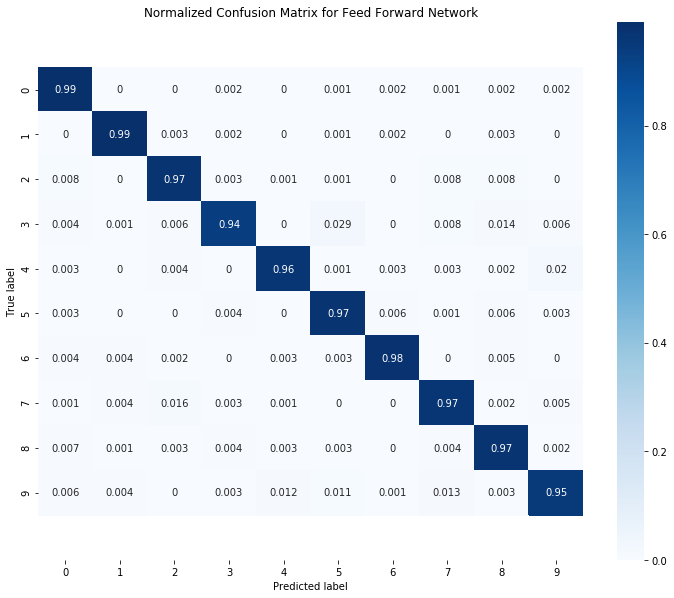

In [35]:
import seaborn as sns
plt.figure(figsize = (10,8))
np.set_printoptions(precision=2)
confusion_table = confusion_table/np.sum(confusion_table,axis=1)
ax = sns.heatmap(confusion_table.round(3) , annot=True,cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for Feed Forward Network')
plt.savefig('Normalized Confusion Matrix for Feed Forward Network')
plt.show()